In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set()

In [5]:
df=pd.read_csv("C:/Users/Nikhil/OneDrive/Documents/projects/netflix-analysis/data/netflix_titles.csv")

In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
# Remove duplicate rows if any
df = df.drop_duplicates()

# Convert date_added to datetime
df["date_added"] = pd.to_datetime(df["date_added"].str.strip(), errors="coerce")


# Create year and month columns for analysis
df["year_added"] = df["date_added"].dt.year
df["month_added"] = df["date_added"].dt.month

df[["title", "type", "country", "date_added", "year_added"]].head()


,title,type,country,date_added,year_added
0,Dick Johnson Is Dead,Movie,United States,2021-09-25,2021.0
1,Blood & Water,TV Show,South Africa,2021-09-24,2021.0
2,Ganglands,TV Show,NaN,2021-09-24,2021.0
3,Jailbirds New Orleans,TV Show,NaN,2021-09-24,2021.0
4,Kota Factory,TV Show,India,2021-09-24,2021.0


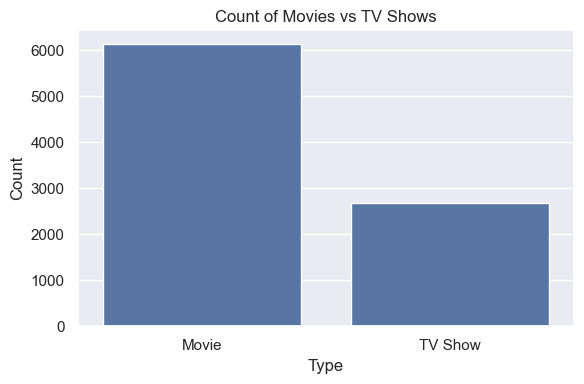

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Count of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()

# Save image
plt.savefig("../images/movies_vs_shows.png")

plt.show()


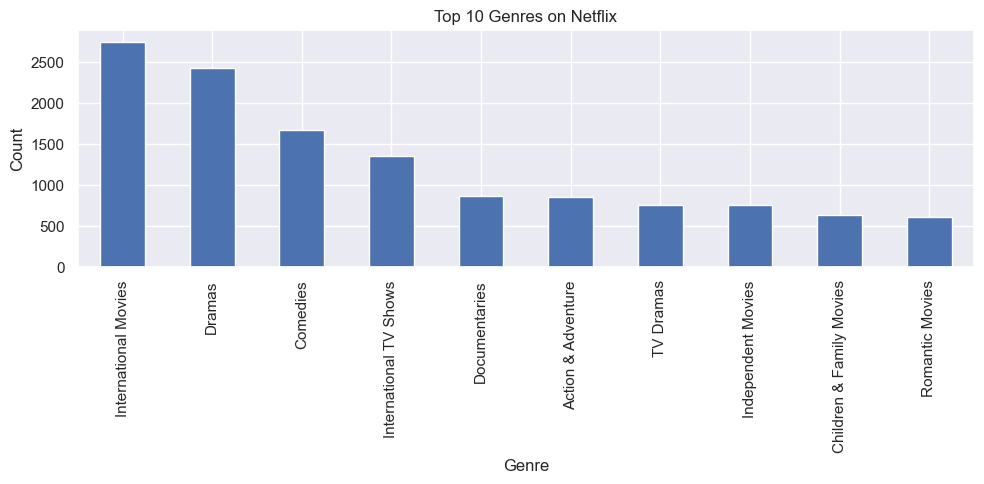

In [10]:
# Split genre strings into individual genres
genres = df["listed_in"].dropna().str.split(", ", expand=True).stack()

top_genres = genres.value_counts().head(10)

plt.figure(figsize=(10,5))
top_genres.plot(kind="bar")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.tight_layout()

plt.savefig("../images/top_genres.png")

plt.show()


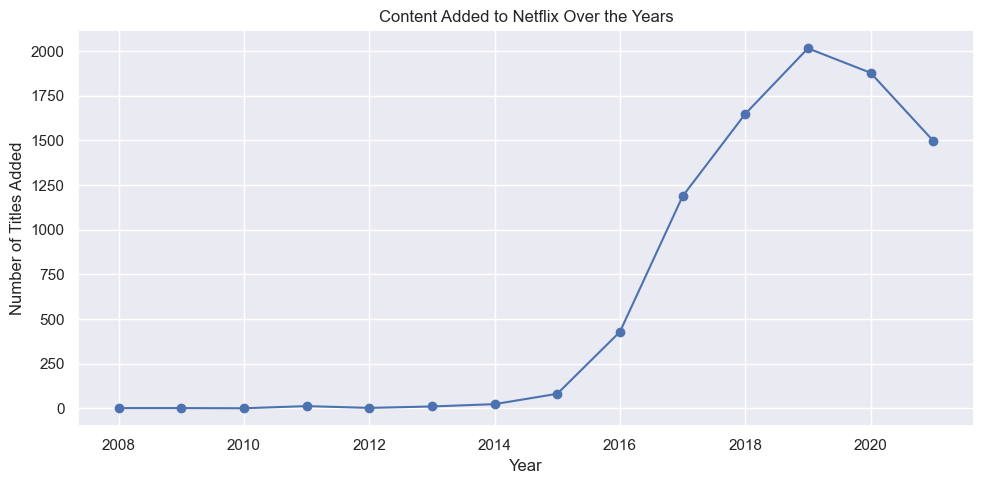

In [11]:
titles_per_year = df["year_added"].value_counts().sort_index()

plt.figure(figsize=(10,5))
titles_per_year.plot(kind="line", marker="o")
plt.title("Content Added to Netflix Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.tight_layout()

plt.savefig("../images/content_added_over_years.png")

plt.show()


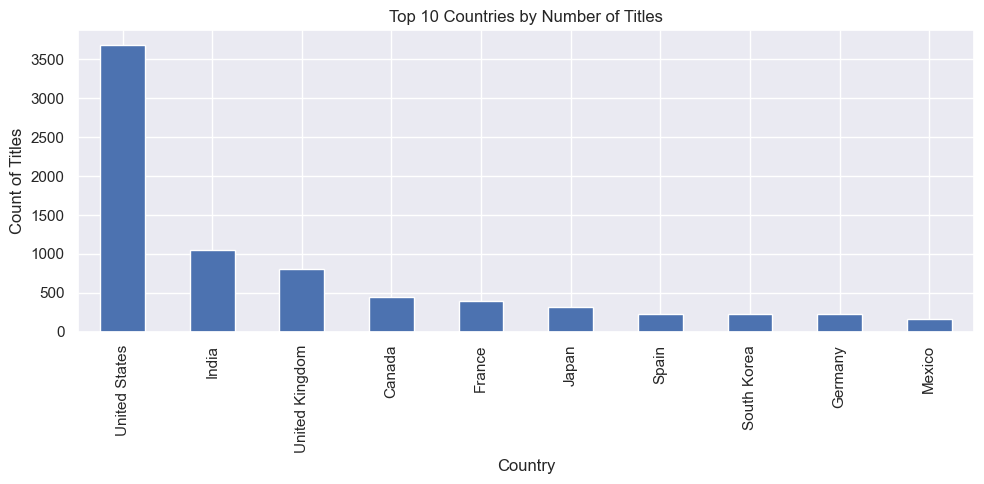

In [12]:
# Split country field into individual countries
countries = df["country"].dropna().str.split(", ", expand=True).stack()

top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,5))
top_countries.plot(kind="bar")
plt.title("Top 10 Countries by Number of Titles")
plt.xlabel("Country")
plt.ylabel("Count of Titles")
plt.tight_layout()

plt.savefig("../images/top_countries.png")

plt.show()
